## Simple Linear Regression

In [1]:
# import required libraries

import pandas as pd
import numpy as np

In [2]:
# load the dataset
df = pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.isnull().any()

,0
YearsExperience,False
Salary,False


In [7]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

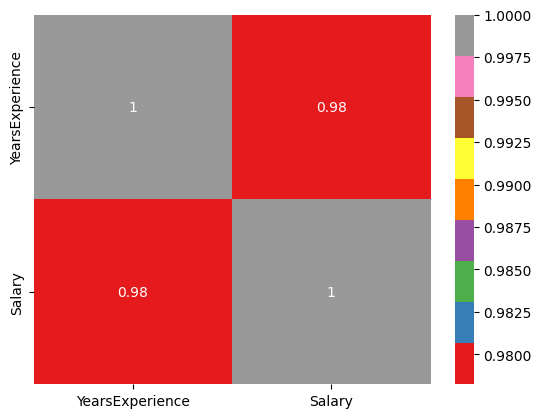

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot =True, cmap = 'Set1')

<ipython-input-11-f35941374136>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YearsExperience)


<Axes: xlabel='YearsExperience', ylabel='Density'>

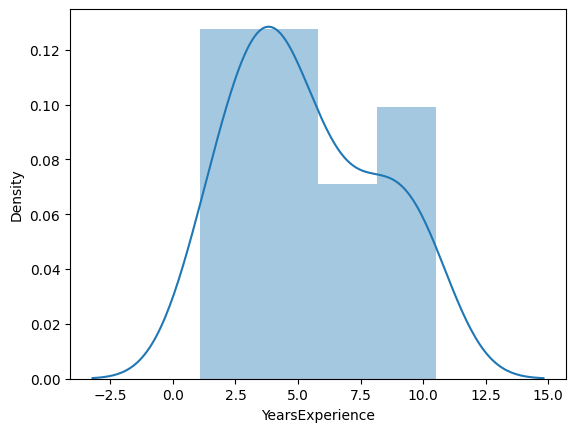

In [11]:
sns.distplot(df.YearsExperience)

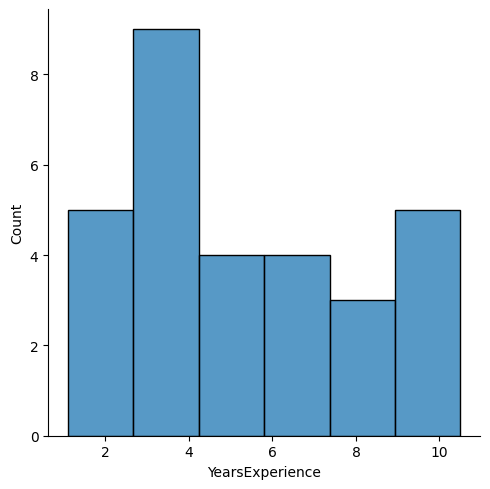

In [12]:
sns.displot(df.YearsExperience)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

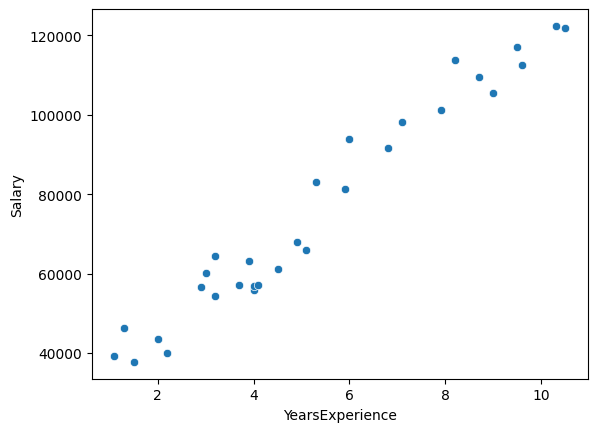

In [13]:
sns.scatterplot(x=df.YearsExperience,y=df.Salary)

### X and y split

In [14]:
X=df.drop(columns = ['Salary'],axis = 1)
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [15]:
y= df.Salary
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [17]:
x_train.shape

(21, 1)

In [18]:
x_test.shape

(9, 1)

In [19]:
x_train.head()

,YearsExperience
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5


### Model Building

In [20]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [ ]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0
17,5.3


In [ ]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0


In [ ]:
# predicting with random value

lr.predict([[15.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([171861.4412772])

In [ ]:
lr.predict([[1.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37073.67875601])

In [ ]:
salary = pd.DataFrame({'Actual Salary':y_test,'Predicted Salary':y_pred})
salary

,Actual Salary,Predicted Salary
2,37731.0,40817.783270
28,122391.0,123188.082589
13,57081.0,65154.462615
10,63218.0,63282.410357
26,116969.0,115699.873560
24,109431.0,108211.664531
27,112635.0,116635.899689
11,55794.0,64218.436486
17,83088.0,76386.776158


## Evaluating the model

In [23]:
from sklearn import metrics

In [24]:
# R-square

metrics.r2_score(y_test,y_pred)

0.9740993407213511

In [25]:
# MSE (Mean Square Error)

metrics.mean_squared_error(y_test,y_pred)

23370078.800832972

In [26]:
# RMSE (Root Mean Square Error)

np.sqrt(metrics.mean_squared_error(y_test,y_pred))


4834.260936361728

## Multi Linear Regression

In [27]:
# Load the dataset
data  = pd.read_csv('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
data.shape

(108, 5)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [30]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [31]:
data.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [32]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
data.State.value_counts()

,count
State,
New York,39
California,36
Florida,33


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
data.State = le.fit_transform(data.State)

In [35]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [36]:
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241379,0.725978,0.056264,0.964770
Administration,0.241379,1.000000,-0.024699,0.039406,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.055431,0.748957
State,0.056264,0.039406,0.055431,1.000000,0.061662
Profit,0.964770,0.198849,0.748957,0.061662,1.000000


<Axes: >

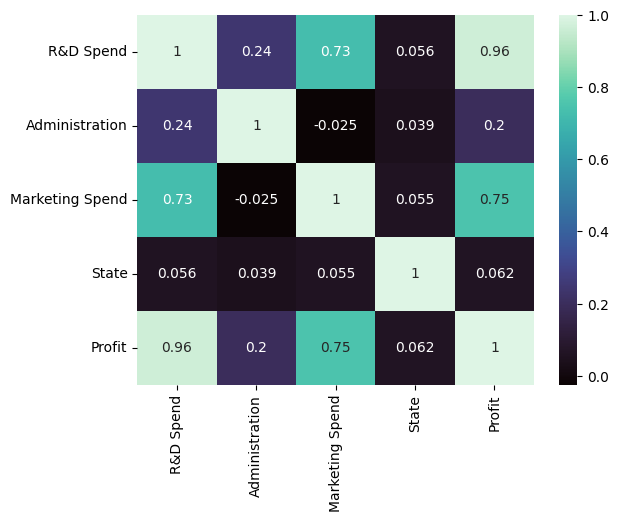

In [37]:
sns.heatmap(data.corr(),annot = True, cmap = 'mako')

In [38]:
data.corr().Profit.sort_values(ascending = False)

,Profit
Profit,1.000000
R&D Spend,0.964770
Marketing Spend,0.748957
Administration,0.198849
State,0.061662


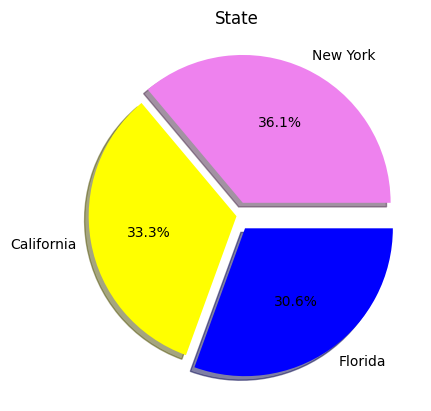

In [39]:
import matplotlib.pyplot as plt
plt.pie(data['State'].value_counts(), [0.1,0,0.1], labels= ['New York','California','Florida'], autopct = '%1.1f%%', shadow = True,colors = ['violet','yellow','blue'])
plt.title('State')
plt.show()



```
# This is formatted as code
```



<Axes: xlabel='R&D Spend', ylabel='Profit'>

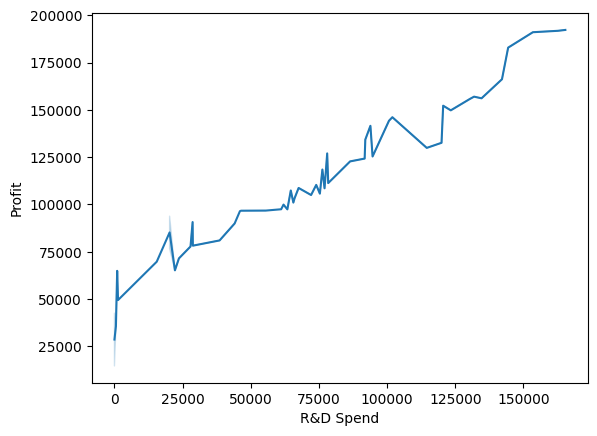

In [40]:
sns.lineplot(x=data['R&D Spend'],y = data.Profit)

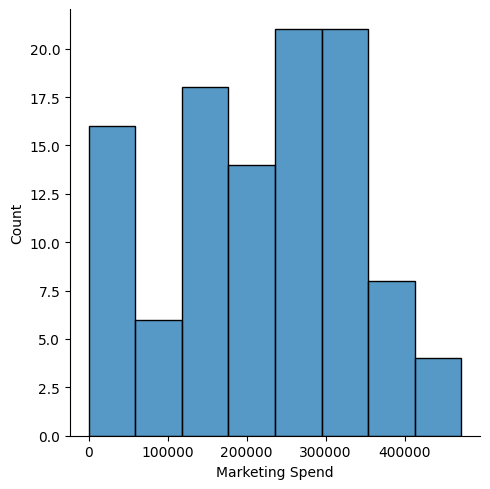

In [41]:
sns.displot(data['Marketing Spend'])

## X and y Split

In [42]:
X = data.iloc[:,:-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [43]:
y=data.Profit
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [45]:
scaled_x = pd.DataFrame(scale.fit_transform(X),columns = X.columns)
scaled_x.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352


### Train test split

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.2,random_state =0)

In [47]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State
26,0.008251,0.823118,-0.689174,-0.033352
93,1.499255,-1.116321,1.288141,-0.033352
33,-0.434616,-0.687365,-0.002708,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
66,-0.063673,0.224807,1.177531,1.167315


In [ ]:
x_train.shape


(86, 4)

In [ ]:
x_test.shape

(22, 4)

In [48]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()

In [49]:
model.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred1 = model.predict(x_test)
y_pred1

array([ 48379.24868386, 134848.9192467 ,  76483.10965225, 181561.78529188,
       112966.00035112, 134241.68257226, 129222.38731942, 160017.05919784,
       116752.96050775,  46260.9926407 , 102266.36060189, 115568.27177598,
        48379.24868386, 119114.16525526,  88602.22002789, 127101.40273623,
       127101.40273623,  90942.33421515,  58677.7334991 , 146304.26215166,
       149410.05441   , 152502.87810448])

In [51]:
y_test

,Profit
84,64926.08
10,146121.95
75,90708.19
2,191050.39
24,108552.04
100,144259.40
107,124266.90
7,155752.60
16,126992.93
86,42559.73


In [52]:
profit = pd.DataFrame({'Actual Profit':y_test,'Predicted Profit':y_pred1})
profit

,Actual Profit,Predicted Profit
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [53]:
# predicting the profit with random values

model.predict([[15000,12000,50000,2]])/10000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73064.33821996])

## Evaluating the model

In [54]:
# R-Square
metrics.r2_score(y_test,y_pred1)

0.9258962347553816

In [55]:
# MSE
metrics.mean_squared_error(y_test,y_pred1)

96015241.54707724

In [56]:
#RMSE

np.sqrt(metrics.mean_squared_error(y_test,y_pred1))

9798.7367322057